In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

## Problem 1


In [3]:

controlled = np.zeros(25) #50% untreated
treatmented = np.zeros(25) #90% recovered
for i in range(12):
    controlled[i] = 1 # 1 for recovered

for i in range(22):
    treatmented[i] = 1



# compute the difference
observed_statistic = treatmented.mean() - controlled.mean()
print(observed_statistic)

0.4


In [4]:
# need to sample two random subdivisions multiple times
class random_groupings:
    
    def __init__(self, group_one, group_two):
        self.n_one = group_one.size # number of samples in group one
        self.n_two = group_two.size # same for group two
        self.n_all = self.n_one + self.n_two # size of the data
        self.all = np.concatenate((group_one, group_two), axis=0) # merged data
        
    def generate_random_split(self):
        temp = self.all.copy() # copy to avoid corruption by user
        np.random.shuffle(temp) # now the columns are shuffled
        go = temp[:self.n_one] # group one
        gt = temp[self.n_one:] # group two
        return (go, gt)
    
    
# obtain distribution under the null hypothesis of no difference
NR = 10**4
rg = random_groupings(controlled, treatmented) # feed data to object
random_statistics = np.zeros(NR)
for i in range(NR):
    goo, gtt = rg.generate_random_split()
    random_statistics[i] = goo.mean() - gtt.mean()
    
    
# is this significant? 
# compute the p-value
p_value = np.sum(random_statistics >= observed_statistic) / random_statistics.size
print('p value is ', p_value)

p value is  0.002


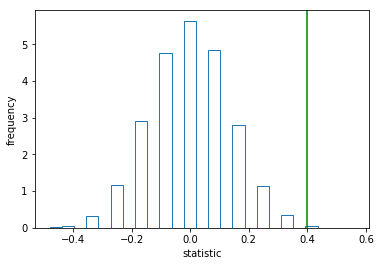

In [6]:
# plot the distribution
plt.hist(random_statistics, histtype='step', bins=25, density=True);
plt.xlabel('statistic')
plt.ylabel('frequency')
plt.axvline(x=observed_statistic, color='green');

## Problem 2

In [ ]:
#sample size
N = 150; 
#number of genes in each sample
n = 1000
class experiment:
    def __init__(self, N):
        self.N = N
        
    def control_group(self):
        self.control = np.random.lognormal(mean = 0, sigma = 1, size = 1000)
        return self.control
    
    def disease_group(self):
        
        self.genes10 = np.random.lognormal(mean = 1, size = 10)
        self.genes100 = np.random.lognormal(mean = 0.1, size = 100)
        self.restgenes = np.random.lognormal(mean = 0, size =890)
        self.whole = np.concatenate((self.genes10, self.genes100, self.restgenes))
        
        return self.whole

control = np.array(n * N)
disease = np.array(n* N)
observed_difference = np.array(N)
nc = experiment(1)

for i in range(N):
    control = np.append(control, nc.control_group())
    disease = np.append(disease, nc.disease_group())
    
for i in range(N):
    observed_statistic = disease[i: ].mean() - control[i: ].mean()
    observed_difference = np.append(observed_statistic, observed_difference)

In [ ]:
# need to sample two random subdivisions multiple times
class random_groupings:
    
    def __init__(self, group_one, group_two):
        self.n_one = group_one.size # number of samples in group one
        self.n_two = group_two.size # same for group two
        self.n_all = self.n_one + self.n_two # size of the data
        self.all = np.concatenate((group_one, group_two), axis=0) # merged data
        
    def generate_random_split(self):
        temp = self.all.copy() # copy to avoid corruption by user
        np.random.shuffle(temp) # now the columns are shuffled
        go = temp[ :self.n_one] # group one
        gt = temp[self.n_one: ] # group two
        return (go, gt)

In [ ]:
# obtain distribution under the null hypothesis of no difference
NR = 10**4
allp_values = sorted_p_values = significant_genes = []
for i in range(N):
    rg = random_groupings(control[i: ], disease[i: ]) # feed data to object
    random_statistics = np.zeros(NR)
    for i in range(NR):
        go, gt = rg.generate_random_split()
        random_statistics[i] = go.mean() - gt.mean()
    
    # compute the p-value
    p_value = np.sum(random_statistics >= observed_statistic) / random_statistics.size
    allp_values.append(p_value)   
    
    
    
sort_p_values = np.sort(allp_values)
sort_index = np.argsort(allp_values)
print('genes with p value these are significantly expressed with 0.05 cutoff')
alpha = 0.05
for i in range(N):
    q_value = (sort_p_values[i]*N) / (sort_index[i]+1)
    if q_value < alpha:
        significant_genes.append(sort_p_values[i])

print(significant_genes)
print('\nTotal number of significantly expressed genes are ', len(significant_genes))

In [1]:
#Could not show output becuase of very long simulation time. 